<a href="https://colab.research.google.com/github/CakeNuthep/SIMPLE_MNIST_WITH_CNN/blob/main/Simple_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST


**Resource:** [Keras example](https://keras.io/examples/vision/mnist_convnet/),[MNIST In Keras](https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb#scrollTo=xwiCQA08KQpe),[CNN Explainer](https://poloclub.github.io/cnn-explainer/?fbclid=IwAR1KVQ7wQ0_p73MrmL7bsCImfBGGHTLkQkiohfHC60fnRx0tEhZ6DphCY0s)<br>

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(x_train, -1)
X_test = np.expand_dims(x_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


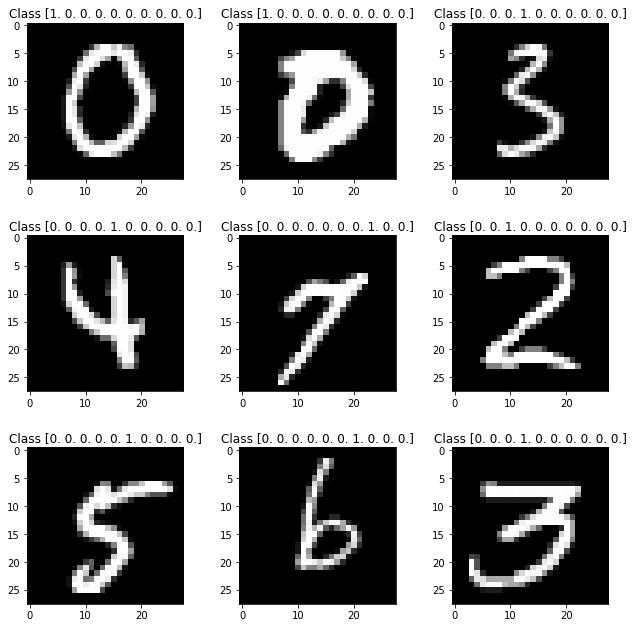

In [3]:
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))
    
plt.tight_layout()

In [4]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [4 for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            if y != 0:
              print(("{:.2f}").format(y), end="  ")
            else:
              print(("{:4g}").format(y),end="  ")
        print("")

# now print!        
matprint(x_train[num] )

   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0  
   0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0 

## Build the model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 10)          910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 160)               0

## Train the model

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 18s 5ms/step - loss: 0.9834 - accuracy: 0.6819 - val_loss: 0.1436 - val_accuracy: 0.9563
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1609 - accuracy: 0.9516 - val_loss: 0.0886 - val_accuracy: 0.9753
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1101 - accuracy: 0.9665 - val_loss: 0.0780 - val_accuracy: 0.9782
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.0705 - val_accuracy: 0.9798
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0784 - accuracy: 0.9766 - val_loss: 0.0642 - val_accuracy: 0.9810
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0723 - accuracy: 0.9777 - val_loss: 0.0597 - val_accuracy: 0.9818
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0610 - accuracy: 0.9805 - val_loss: 0.0592 - val_accuracy: 0.9807
Epoch

## Evaluate the trained model

In [7]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.045572683215141296
Test accuracy: 0.9847000241279602


In [8]:
predicted_classes = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [9]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

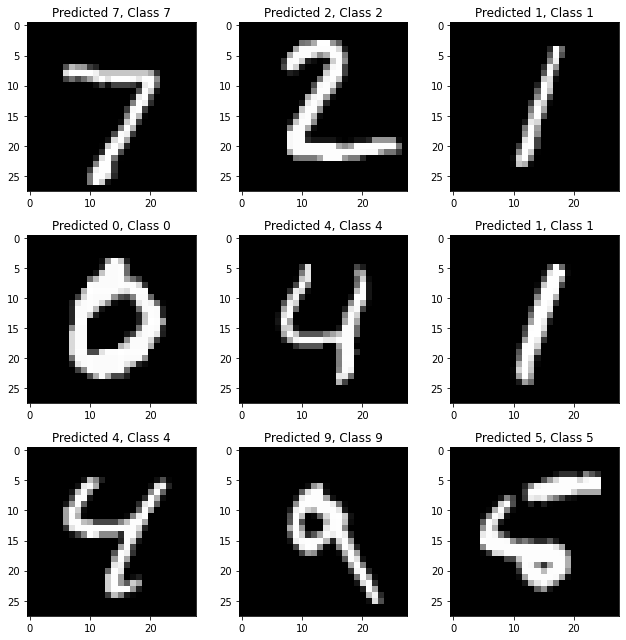

In [10]:
plt.figure()
for i, predict in enumerate(predicted_classes[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predict, y_test[i]))
    
plt.tight_layout()